In [192]:
import sqlite3
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.display import IFrame

In [193]:
db_file = "nuremberg_stops_immoscout.sqlite"
table_immoscout = "immoscout"
table_nuremberg_stops = "nuremberg_stops"

df_immoscout = None
df_nuremberg_stops =None

In [194]:
# Connect to the SQLite database
conn = sqlite3.connect(db_file)

# Fetch and print the data from 'parking_violations'
cursor = conn.execute(f'SELECT * FROM {table_immoscout}')

data_immoscout = cursor.fetchall()

# Get the column names from the cursor description
column_names = [description[0] for description in cursor.description]

# Create a DataFrame from the results and column names
df_immoscout = pd.DataFrame(data_immoscout, columns=column_names)

In [195]:
cursor = conn.execute(f'SELECT * FROM {table_nuremberg_stops}')

data_nuremberg_stops = cursor.fetchall()

# Get the column names from the cursor description
column_names = [description[0] for description in cursor.description]

# Create a DataFrame from the results and column names
df_nuremberg_stops = pd.DataFrame(data_nuremberg_stops, columns=column_names)
conn.close()

In [196]:
df_immoscout.columns

Index(['federalState', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'noParkSpaces',
       'firingTypes', 'hasKitchen', 'cellar', 'yearConstructedRange',
       'baseRent', 'houseNumber', 'livingSpace', 'condition', 'interiorQual',
       'petsAllowed', 'street', 'streetPlain', 'lift', 'baseRentRange',
       'typeOfFlat', 'zipCode', 'noRooms', 'thermalChar', 'floor',
       'numberOfFloors', 'noRoomsRange', 'garden', 'livingSpaceRange',
       'district', 'cityTown', 'description', 'facilities', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice', 'date', 'latitude', 'longitude'],
      dtype='object')

In [197]:
df_immoscout.head(5)

,federalState,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,pricetrend,telekomUploadSpeed,totalRent,...,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,latitude,longitude
0,Bayern,120.00,central_heating,ONE_YEAR_FREE,0.0,0,1,5.49,40.0,720.00,...,Bei diesem Objekt handelt es sich um ein renov...,- Bad mit Dusche und Fenster\n- Linoleumböden\...,0.0,B,2017.0,0.00,0.0000,Feb20,NaN,NaN
1,Bayern,130.88,central_heating,ONE_YEAR_FREE,0.0,0,1,6.67,40.0,843.88,...,Modernes Citywohnen - lebenswert und zentral!\...,+ Hochwertige Möblierung \n+ Lichtdurchflutete...,0.0,0,0.0,0.00,0.0000,May19,NaN,NaN
2,Bayern,220.00,0,ONE_YEAR_FREE,10.0,0,1,5.21,10.0,1015.79,...,Die großzügige 3-Zimmerwohnung befindet sich i...,Die 3-Zimmerwohnung ist ausgestattet mit: \n\r...,100.0,0,0.0,0.00,0.0000,May19,49.456003,11.092123
3,Bayern,80.00,0,ONE_YEAR_FREE,0.0,0,0,4.40,40.0,640.00,...,"sie finden hier eine neu renovierte, helle 3-Z...","Laminatboden in Schlafzimmer, Wohnzimmer und K...",0.0,0,0.0,90.76,0.1915,Sep18,NaN,NaN
4,Bayern,80.00,central_heating,ONE_YEAR_FREE,0.0,0,1,5.15,40.0,1624.60,...,Diese Mansarden-Wohnung in der vierten Etage z...,"Bad, Küche, WC jeweils am Fußboden mit Holz im...",125.0,0,2018.0,90.76,0.1915,Sep18,NaN,NaN


In [198]:
df_nuremberg_stops.columns

Index(['VAGIdentifier', 'VAGIdentifierChar', 'stopName', 'latitude',
       'longitude'],
      dtype='object')

In [ ]:
df_nuremberg_stops.head(5)

In [ ]:
#unique Street Names in immoscout data
streets = df_immoscout['cityTown'].unique()
print(len(streets))

In [ ]:
#unique Street Names in nuremberg_stops data
stops = df_nuremberg_stops['stopName'].unique()
print(len(stops))

In [ ]:
# Check for None values in latitude column and replace with mean value
mean_latitude = df_immoscout['latitude'].mean()
df_immoscout['latitude'].fillna(mean_latitude, inplace=True)

# Check for None values in longitude column and replace with mean value
mean_longitude = df_immoscout['longitude'].mean()
df_immoscout['longitude'].fillna(mean_longitude, inplace=True)


In [ ]:
df_immoscout.head(5)

Find the common values between the 'regio3' column in df_immoscout and the 'stopName' column in df_nuremberg_stops,

In [ ]:
# Find common values
common_values = set(streets) & set(stops)

print(common_values)

In [ ]:
# Calculate frequency of common values
frequency = {}
for value in common_values:
    street_regex = re.compile(r'\b' + re.escape(value) + r'\b', re.IGNORECASE)
    street_count = df_immoscout['cityTown'].str.lower().str.match(street_regex).sum()
    stop_regex = re.compile(r'\b' + re.escape(value) + r'\b', re.IGNORECASE)
    stop_count = df_nuremberg_stops['stopName'].str.lower().str.match(stop_regex).sum()
    frequency[value] = (street_count, stop_count)

# Print common values and their frequencies
for value, (street_count, stop_count) in frequency.items():
    print(f"Value: {value}, Frequency in df_immoscout: {street_count}, Frequency in df_nuremberg_stops: {stop_count}")

Extract Values for plots

In [ ]:
values = []
freq_immoscout = {}
freq_nuremberg_stops = {}

for street in streets:
    for stop in stops:
        if street.lower() in stop.lower() or stop.lower() in street.lower():
            if street not in values:
                values.append(street)
                freq_immoscout[street] = 0
                freq_nuremberg_stops[street] = 0
            freq_immoscout[street] += 1
            freq_nuremberg_stops[street] += 1

print("Value\t\tFrequency in df_immoscout\tFrequency in df_nuremberg_stops")
for value in values:
    print(f"{value}\t\t{freq_immoscout[value]}\t\t\t\t{freq_nuremberg_stops[value]}")


# Plotting

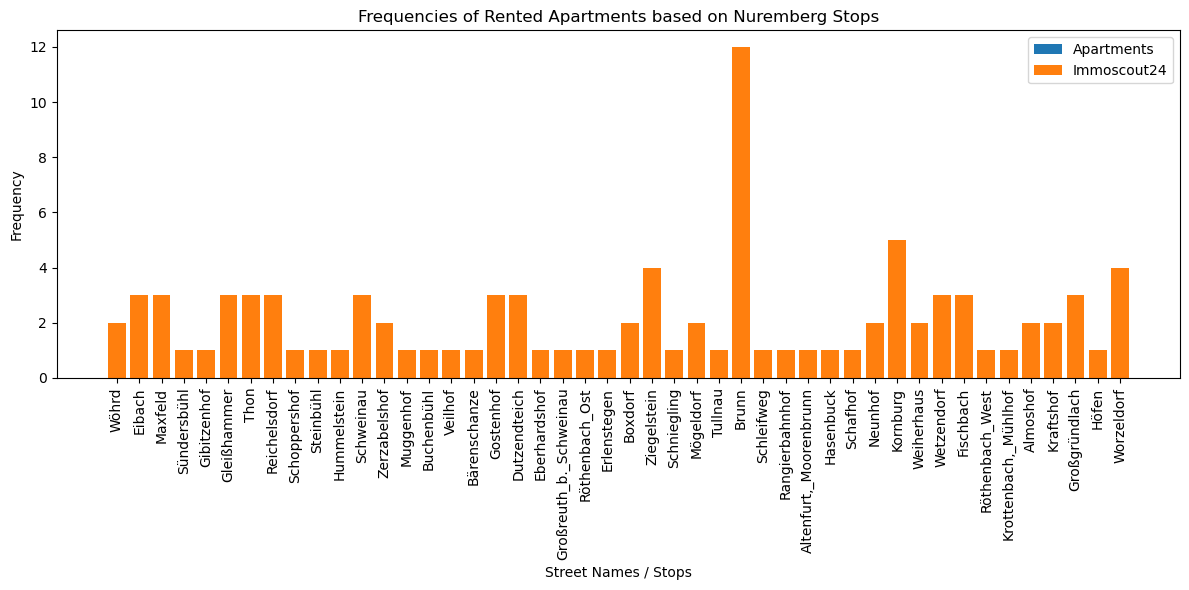

In [185]:
plt.figure(figsize=(12, 6))
plt.bar(values, [freq_immoscout[value] for value in values], label='Apartments')
plt.bar(values, [freq_nuremberg_stops[value] for value in values], label='Immoscout24')
plt.xticks(rotation=90)
plt.xlabel('Street Names / Stops')
plt.ylabel('Frequency')
plt.title('Frequencies of Rented Apartments based on Nuremberg Stops')
plt.legend()
plt.tight_layout()
plt.show()

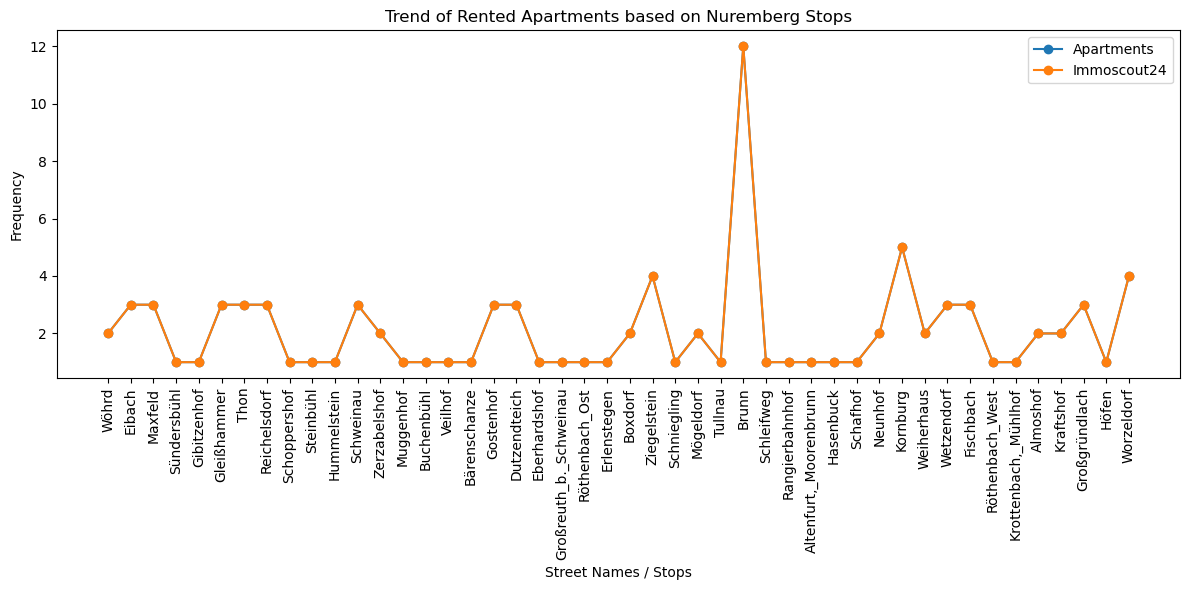

In [186]:
plt.figure(figsize=(12, 6))
plt.plot(values, [freq_immoscout[value] for value in values], marker='o', label='Apartments')
plt.plot(values, [freq_nuremberg_stops[value] for value in values], marker='o', label='Immoscout24')
plt.xticks(rotation=90)
plt.xlabel('Street Names / Stops')
plt.ylabel('Frequency')
plt.title('Trend of Rented Apartments based on Nuremberg Stops')
plt.legend()
plt.tight_layout()
plt.show()


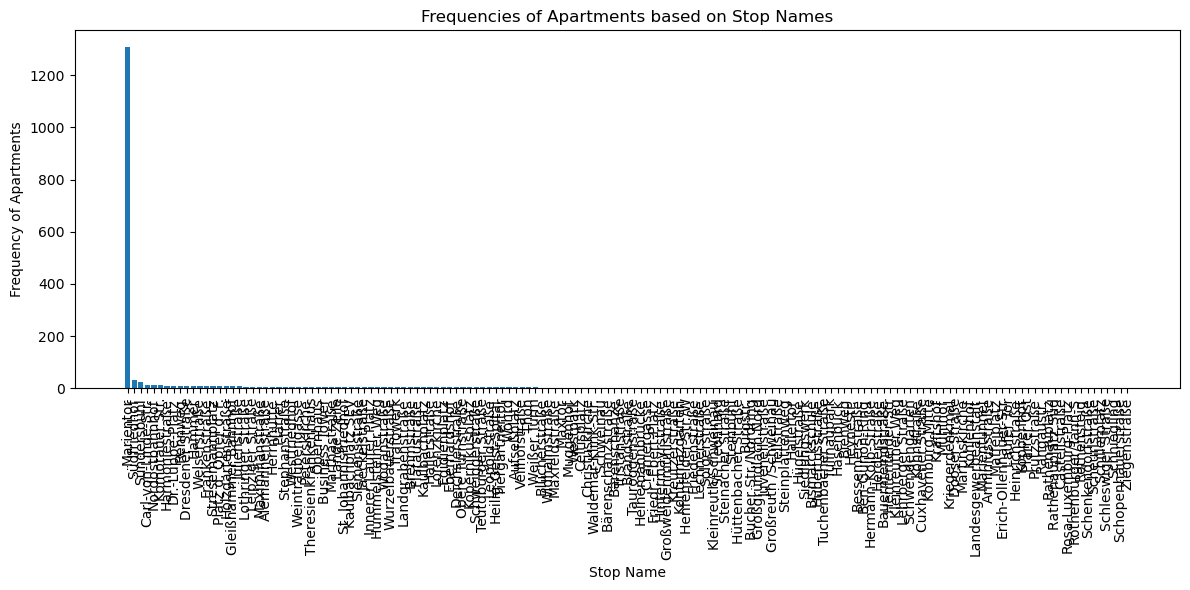

In [188]:
import matplotlib.pyplot as plt

# Calculate the frequencies of apartments based on stop names
freq_apartments_by_stop = df_immoscout.groupby('stopName').size()

# Sort the frequencies in descending order
freq_apartments_by_stop = freq_apartments_by_stop.sort_values(ascending=False)

# Plot the frequencies as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(freq_apartments_by_stop.index, freq_apartments_by_stop.values)
plt.xticks(rotation=90)
plt.xlabel('Stop Name')
plt.ylabel('Frequency of Apartments')
plt.title('Frequencies of Apartments based on Stop Names')
plt.tight_layout()
plt.show()


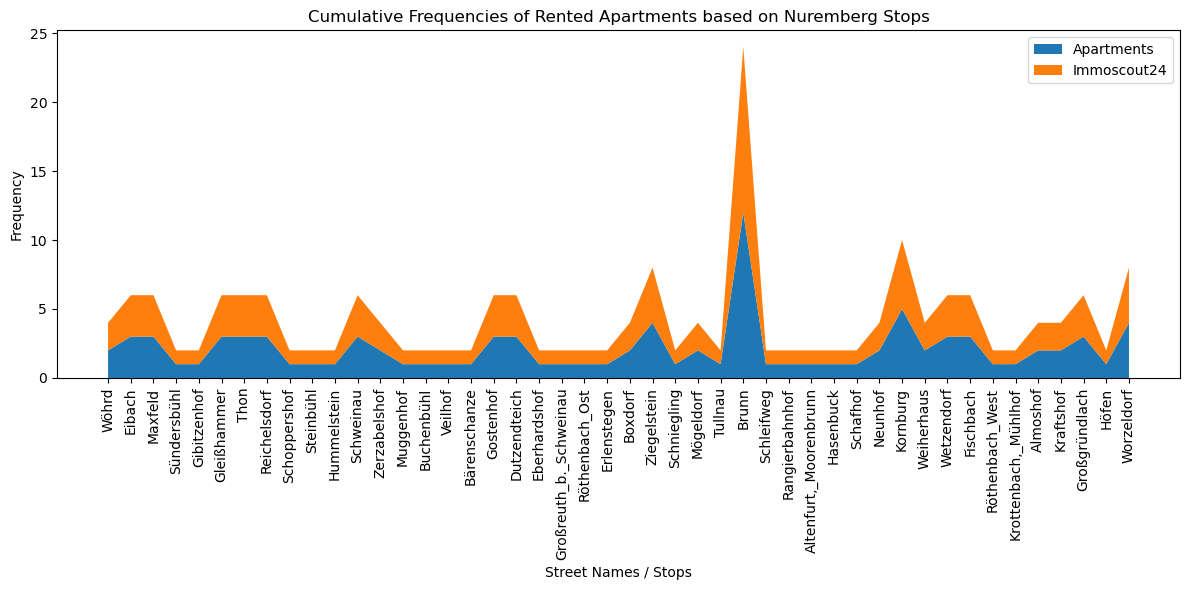

In [187]:
plt.figure(figsize=(12, 6))
plt.stackplot(values,
              [freq_immoscout[value] for value in values],
              [freq_nuremberg_stops[value] for value in values],
              labels=['Apartments', 'Immoscout24'])
plt.xticks(rotation=90)
plt.xlabel('Street Names / Stops')
plt.ylabel('Frequency')
plt.title('Cumulative Frequencies of Rented Apartments based on Nuremberg Stops')
plt.legend()
plt.tight_layout()
plt.show()


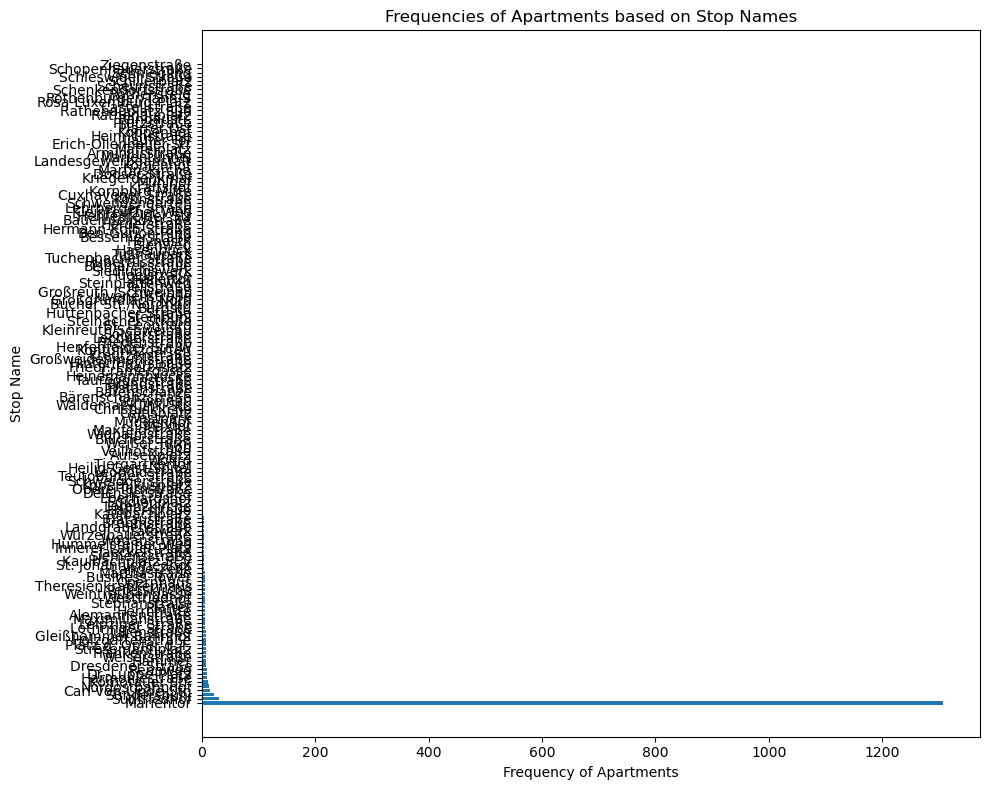

In [189]:
import matplotlib.pyplot as plt

# Calculate the frequencies of apartments based on stop names
freq_apartments_by_stop = df_immoscout.groupby('stopName').size()

# Sort the frequencies in descending order
freq_apartments_by_stop = freq_apartments_by_stop.sort_values(ascending=False)

# Plot the frequencies as a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(freq_apartments_by_stop.index, freq_apartments_by_stop.values)
plt.xlabel('Frequency of Apartments')
plt.ylabel('Stop Name')
plt.title('Frequencies of Apartments based on Stop Names')
plt.tight_layout()
plt.show()


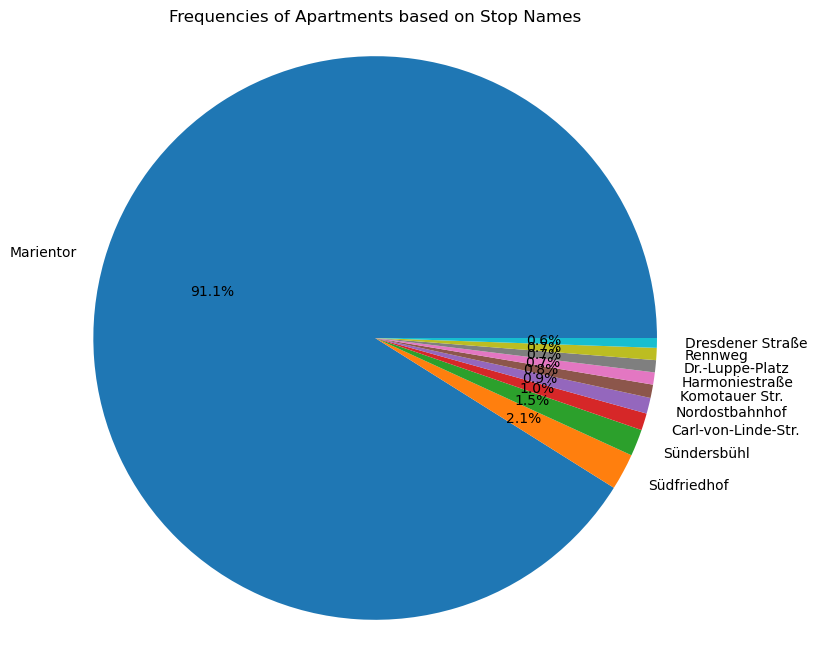

In [191]:
import matplotlib.pyplot as plt

# Calculate the frequencies of apartments based on stop names
freq_apartments_by_stop = df_immoscout.groupby('stopName').size()

# Sort the frequencies in descending order
freq_apartments_by_stop = freq_apartments_by_stop.sort_values(ascending=False)
freq_apartments_by_stop = freq_apartments_by_stop[0:10]

# Plot the frequencies as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(freq_apartments_by_stop.values, labels=freq_apartments_by_stop.index, autopct='%1.1f%%')
plt.title('Frequencies of Apartments based on Stop Names')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


Extract Latitude and Longitude from data

In [ ]:
# Create an empty dictionary for street coordinates
street_coordinates = {}

# Extract latitude and longitude for streets in values list
for value in values:
    # Filter df_nuremberg_stops for the current street value
    filtered_df = df_nuremberg_stops[df_nuremberg_stops['stopName'].str.contains(value, case=False)]

    if not filtered_df.empty:
        # Extract the first latitude, longitude, and stop name
        latitude = filtered_df['latitude'].values[0]
        longitude = filtered_df['longitude'].values[0]
        stop_name = filtered_df['stopName'].values[0]

        # Save latitude, longitude, and stop name as a list in the street_coordinates dictionary
        street_coordinates[value] = [latitude, longitude, stop_name]

print("Actual Stops:",len(values))
print("Latitude/Longitude found for:",len(street_coordinates))


In [ ]:
from tabulate import tabulate

# Prepare the data for the table
table_data = []
for value in values:
    if value in street_coordinates:
        freq = freq_nuremberg_stops[value]
        if freq > 0:
            coordinates = street_coordinates[value]
            latitude = coordinates[0]
            longitude = coordinates[1]
            table_data.append([value, freq, longitude, latitude])

# Define the table headers
headers = ["Stop Name", "Frequency", "Longitude", "Latitude"]

# Print the table with beautiful formatting
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))

In [199]:
import folium

scale_factor = 3

# Create a map centered on Nuremberg
nuremberg_map = folium.Map(location=[49.4521, 11.0767], zoom_start=12)

# Define a color palette for the circle markers
color_palette = ['blue', 'green', 'red', 'orange', 'purple', 'yellow']

# Add circles representing the frequencies
for idx, value in enumerate(values):
    freq = freq_immoscout[value]
    if freq > 0:
        # Check if the key exists in street_coordinates
        if value in street_coordinates:
            # Get the street coordinates
            coordinates = street_coordinates[value]
            latitude = [coordinates[0]]
            longitude = [coordinates[1]]

            # Iterate over the latitude and longitude values
            for lat, lon, street_name in zip(latitude, longitude, coordinates[2:]):
                # Define the circle's radius based on frequency (adjust the scale_factor to your liking)
                radius = freq * scale_factor

                # Create a circle marker at the current latitude and longitude
                location = [lat, lon]
                # Assign a color based on the index in the color palette
                color = color_palette[idx % len(color_palette)]
                circle_marker = folium.CircleMarker(location=location, radius=radius, color=color,
                                                    fill=True, fill_color=color, fill_opacity=0.6)
                # Create a popup with the frequency and street name
                popup_text = f"Street: {street_name}<br>Frequency: {freq}"
                popup = folium.Popup(popup_text, max_width=200)
                # Add the popup to the circle marker
                circle_marker.add_child(popup)
                # Add the circle marker to the map
                circle_marker.add_to(nuremberg_map)
        # else:
            #print(f"Coordinates not found for street: {value}")

# Save the map as an HTML file
nuremberg_map.save('frequency_map.html')

nuremberg_map

'federalState', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'noParkSpaces',
       'firingTypes', 'hasKitchen', 'cellar', 'yearConstructedRange',
       'baseRent', 'houseNumber', 'livingSpace', 'condition', 'interiorQual',
       'petsAllowed', 'street', 'streetPlain', 'lift', 'baseRentRange',
       'typeOfFlat', 'zipCode', 'noRooms', 'thermalChar', 'floor',
       'numberOfFloors', 'noRoomsRange', 'garden', 'livingSpaceRange',
       'district', 'cityTown', 'description', 'facilities', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice', 'date', 'latitude', 'longitude'

In [ ]:
selected_columns = ['federalState', 'zipCode', 'district', 'cityTown', 'street', 'houseNumber','latitude', 'longitude']
first_five_rows = df_immoscout[selected_columns].head(5)
print(first_five_rows)

Problem: Optimal Location Selection: Analyzing the rental prices in proximity to public transport stops can help individuals or businesses identify the areas with affordable rents and convenient access to transportation. This information can be valuable for people looking for rental properties near public transport stops.

Solution:

Calculating Distance: The code uses the Haversine formula to calculate the distance between each rental property and all public transport stops. The haversine function takes latitude and longitude coordinates of two locations and returns the distance between them in meters.

Filtering by Proximity: The code filters the rental properties based on their proximity to public transport stops. It applies a proximity threshold (in this case, 500 meters) and selects only the rental properties that are within the specified distance of a public transport stop. The filtered properties are stored in the df_filtered DataFrame.

Analyzing Rental Prices: After filtering the rental properties, the code calculates various statistics related to rental prices within proximity to public transport stops. It calculates the mean (mean_rental_price), median (median_rental_price), and standard deviation (std_rental_price) of the rental prices for the filtered properties. These statistics provide insights into the affordability of rental properties near public transport stops.

Visualization: The code creates a map using the Folium library, centered around Nuremberg with a specified zoom level. It then adds markers to the map to represent the filtered rental properties (blue markers) and public transport stops (red markers). Each marker displays relevant information such as rental price or stop name as a popup when clicked.

By visualizing the rental properties and public transport stops on the map and providing information about rental prices, the code helps individuals or businesses identify optimal locations for rental properties near public transport stops. It allows users to assess the affordability and convenience of different areas, making it easier to make informed decisions when selecting a location.

In [ ]:
import folium
from math import radians, sin, cos, sqrt, atan2

# Step 2: Calculate Distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from decimal degrees to radians
    lat1_rad, lon1_rad, lat2_rad, lon2_rad = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = sin(dlat/2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = 6371 * c  # Radius of the Earth in kilometers
    return distance * 1000  # Convert distance to meters

# Iterate over each row in the DataFrame
for index, row in df_immoscout.iterrows():
    # Initialize an empty list to store distances, stop names, latitudes, and longitudes
    distances = []
    stop_names = []
    stop_latitudes = []
    stop_longitudes = []

    # Calculate the distance between the rental property and all public transport stops
    for stop_index, stop_row in df_nuremberg_stops.iterrows():
        distance = haversine(row['latitude'], row['longitude'], stop_row['latitude'], stop_row['longitude'])
        distances.append(distance)
        stop_names.append(stop_row['stopName'])
        stop_latitudes.append(stop_row['latitude'])
        stop_longitudes.append(stop_row['longitude'])

    # Assign the minimum distance, corresponding stop name, latitude, and longitude to the respective columns
    min_distance_index = distances.index(min(distances))
    df_immoscout.at[index, 'distance_to_stop'] = min(distances)
    df_immoscout.at[index, 'stopName'] = stop_names[min_distance_index]
    df_immoscout.at[index, 'stopLatitude'] = stop_latitudes[min_distance_index]
    df_immoscout.at[index, 'stopLongitude'] = stop_longitudes[min_distance_index]

# Step 3: Filter by Proximity
proximity_threshold = 500  # meters
df_filtered = df_immoscout[df_immoscout['distance_to_stop'] <= proximity_threshold]

# Step 4: Analyze Rental Prices
mean_rental_price = df_filtered['totalRent'].mean()
median_rental_price = df_filtered['totalRent'].median()
std_rental_price = df_filtered['totalRent'].std()

print("mean_rental_price:", mean_rental_price)
print("median_rental_price:", median_rental_price)
print("std_rental_price:", std_rental_price)

# Step 5: Create a map
nuremberg_map = folium.Map(location=[49.4521, 11.0767], zoom_start=12)

# Step 6: Add markers for rental listings (in blue color)
for index, row in df_filtered.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup=f"Rental Property: {row['totalRent']}",
                  icon=folium.Icon(color='blue')).add_to(nuremberg_map)

# Step 7: Add markers for public transport stops in proximity (in red color)
for index, row in df_filtered.iterrows():
    folium.Marker(location=[row['stopLatitude'], row['stopLongitude']],
                  popup=f"Stop Name: {row['stopName']}",
                  icon=folium.Icon(color='red')).add_to(nuremberg_map)

# Save the map as an HTML file
nuremberg_map.save('rental_map.html')

nuremberg_map